In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(100, 2)


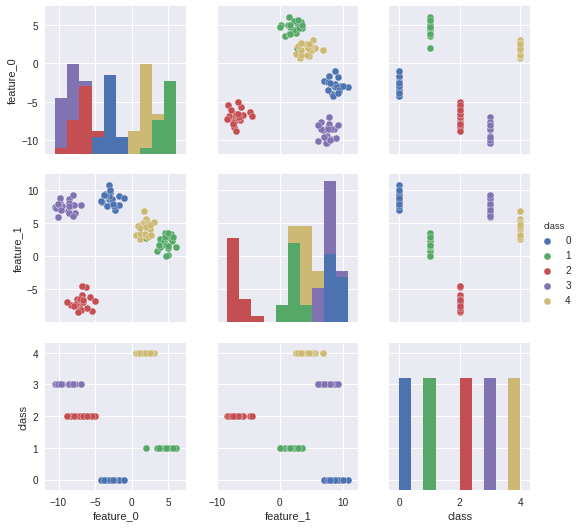

In [2]:
blobs = make_blobs(n_samples=100, n_features=2, centers=5, random_state=42)

X = blobs[0]
y= blobs[1]
print(X.shape)

feature_names = ['feature_'+str(i) for i in range(X.shape[1])]
# feature_names

blobs_df = pd.DataFrame(X, columns = feature_names)
blobs_df['class'] = y

# blobs_df.head()

# blobs_df['class'].value_counts()

sns.pairplot(blobs_df, hue='class')

In [150]:
class KMeansScratch:
    def __init__(self, k=3, epochs=10):
        self.k = k
        self.cluster_labels = list(range(self.k))
        self.epochs = epochs
        self.centroids = None
        self.clusters = None

    def starting_centroids(self, X):
        # create k starting centroids within the space defined by the values of X's features
#         np.random.seed(4)
        low, high = np.min(X), np.max(X)
        size = (self.k, X.shape[1])
        starting_centroids = np.random.uniform(low, high, size)
        
        return starting_centroids
    
    def move_centroids(self, X):
        # move the centroids after clusters have been assigned
        new_centroids = []
        
        for i in self.cluster_labels:
            tmp_X = X[self.clusters == i] #subset X to cluster i
            if tmp_X.shape[0] == 0:
                new_centroids.append(self.centroids[i])
            else:
                tmp_centroid = tmp_X.mean(axis=0)
                new_centroids.append(tmp_centroid)
            
        return np.array(new_centroids)
    
    def fit(self, X, plotting=False):
        self.centroids = self.starting_centroids(X) # get starting points
        
        if plotting:
            #initial scatter
            fig, ax = plt.subplots(1, figsize=(6,6))
            plt.scatter(x=X[:,0], y=X[:,1], alpha=0.5)
            plt.xlim(-12,12)
            plt.ylim(-12,12)
            plt.xticks([])
            plt.yticks([])
            plt.title("Unclustered Data")
            plt.savefig('assets/plots_for_gifs/kmeans/kmeans_0.png')
            plt.show()
            
            cust_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
            
        for e in range(self.epochs):
            print("In epoch", e)
#             print(self.centroids)
            
            old_centroids = self.centroids.copy()
            old_clusters = self.clusters
            
            dists = cdist(X, self.centroids)
            self.clusters = dists.argmin(axis=1)
            self.centroids = self.move_centroids(X)
              
            if plotting:
                # layer in centroids
                if e == 0:
                    scatter_colors = None
                else:
                    scatter_colors = [cust_colors[i] for i in old_clusters]
                    

                fig, ax = plt.subplots(1, figsize=(6,6))
                plt.scatter(x=X[:,0], y=X[:,1], c=scatter_colors, alpha=0.5)
                plt.scatter(x=old_centroids[:,0], y=old_centroids[:,1], 
                            marker = "*", c=[cust_colors[i] for i in self.cluster_labels], s=100)
                plt.xlim(-12,12)
                plt.ylim(-12,12)
                plt.xticks([])
                plt.yticks([])
                plt.title("Position the centroids")
                plt.savefig('assets/plots_for_gifs/kmeans/kmeans_{}.1.png'.format(str(e)))
                plt.show()

                # measure distance between centroids and points
                fig, ax = plt.subplots(1, figsize=(6,6))
                plt.scatter(x=X[:,0], y=X[:,1], c=scatter_colors, alpha=0.5)
                plt.scatter(x=old_centroids[:,0], y=old_centroids[:,1], 
                            marker = "*", c=[cust_colors[i] for i in self.cluster_labels], s=100)

                for i in range(len(old_centroids)):
                    for j in range(len(X)):   
                        x1 = old_centroids[i,0]
                        y1 = old_centroids[i,1]
                        x2 = X[j,0]
                        y2 = X[j,1]
                        plt.plot([x1, x2], [y1, y2], color=cust_colors[i], alpha=0.6)
                plt.xlim(-12,12)
                plt.ylim(-12,12)
                plt.xticks([])
                plt.yticks([])
                plt.title("measure distance between centroids and points")
                plt.savefig('assets/plots_for_gifs/kmeans/kmeans_{}.2.png'.format(str(e)))
                plt.show()

                # identify shortest distance
                fig, ax = plt.subplots(1, figsize=(6,6))
                plt.scatter(x=X[:,0], y=X[:,1], c=scatter_colors, alpha=0.5)
                plt.scatter(x=old_centroids[:,0], y=old_centroids[:,1], 
                            marker = "*", c=[cust_colors[i] for i in self.cluster_labels], s=100)

                for i in range(len(old_centroids)):
                    tmp_X = X[self.clusters == i]

                    for j in range(len(tmp_X)):   
                        x1 = old_centroids[i,0]
                        y1 = old_centroids[i,1]
                        x2 = tmp_X[j,0]
                        y2 = tmp_X[j,1]
                        plt.plot([x1, x2], [y1, y2], color=cust_colors[i], alpha=0.6)
                plt.xlim(-12,12)
                plt.ylim(-12,12)
                plt.xticks([])
                plt.yticks([])
                plt.title("Identify shortest distances for each point")
                plt.savefig('assets/plots_for_gifs/kmeans/kmeans_{}.3.png'.format(str(e)))
                plt.show()

                # assign clusters
                scatter_colors = [cust_colors[i] for i in self.clusters]
                
                fig, ax = plt.subplots(1, figsize=(6,6))
                plt.scatter(x=X[:,0], y=X[:,1], c=scatter_colors, alpha=0.5)
                plt.scatter(x=old_centroids[:,0], y=old_centroids[:,1], 
                            marker = "*", c=[cust_colors[i] for i in self.cluster_labels], s=100)
                plt.xlim(-12,12)
                plt.ylim(-12,12)
                plt.xticks([])
                plt.yticks([])
                plt.title("Assign points to clusters")
                plt.savefig('assets/plots_for_gifs/kmeans/kmeans_{}.4.png'.format(str(e)))
                plt.show()
                

                #move centroids
                fig, ax = plt.subplots(1, figsize=(6,6))
                plt.scatter(x=X[:,0], y=X[:,1], c=scatter_colors, alpha=0.5)
                plt.scatter(x=old_centroids[:,0], y=old_centroids[:,1], 
                            marker = "*", c=[cust_colors[i] for i in self.cluster_labels], s=100)

#                 print(self.centroids.shape, old_centroids.shape)

                diff = self.centroids - old_centroids
                x = [i[0] for i in old_centroids]
                y = [i[1] for i in old_centroids]

                dx = [0 if np.isnan(i[0]) else i[0] for i in diff]
                dy = [0 if np.isnan(i[1]) else i[1] for i in diff]
#                 print(dx)
#                 print(dy)
#                 print(dx)

                for i in range(len(x)):
                    plt.arrow(x[i], y[i], dx[i], dy[i], color=cust_colors[i],
                             width=0.1, head_width=0.7)

                plt.xlim(-12,12)
                plt.ylim(-12,12)
                plt.xticks([])
                plt.yticks([])
                plt.title("Move the centroids")
                plt.savefig('assets/plots_for_gifs/kmeans/kmeans_{}.5.png'.format(str(e)))
                plt.show()
            
               # draw cluster regions
                if True:
                    centroid_radius = []
        
                    for i in self.cluster_labels:
                        tmp_X = X[self.clusters == i] #subset X to cluster i
                        if tmp_X.shape[0] == 0:
                            centroid_radius.append(0)
                        else:
                            tmp_dist = np.linalg.norm(tmp_X - self.centroids[i], axis=1)
#                             print(tmp_dist)
                            max_dist = tmp_dist[tmp_dist.argmax()]
                            centroid_radius.append(max_dist)
                    
                    centroid_radius = np.array(centroid_radius)
#                     print(centroid_radius)
                    
                    fig, ax = plt.subplots(1, figsize=(6,6))
                    
                    plt.scatter(x=X[:,0], y=X[:,1], c=scatter_colors, alpha=0.5)
                    plt.scatter(x=self.centroids[:,0], y=self.centroids[:,1], 
                                marker = "*", c=[cust_colors[i] for i in self.cluster_labels], s=100)
                    plt.scatter(x=self.centroids[:,0], y=self.centroids[:,1], 
                                s=80*((np.pi * centroid_radius)**2), marker='o', alpha=0.8, 
                                facecolor='none', edgecolor=[cust_colors[i] for i in self.cluster_labels])

                    plt.xlim(-12,12)
                    plt.ylim(-12,12)
                    plt.xticks([])
                    plt.yticks([])
                    plt.title("Cluster regions. Overlaps indicate potential for further iteration")
                    plt.savefig('assets/plots_for_gifs/kmeans/kmeans_{}.6.png'.format(str(e)))
                    plt.show()

            if np.array_equal(old_clusters, self.clusters):
                print("finished in epoch", e)
                break

#             print(np.bincount(self.clusters))

In [151]:
kmeans = KMeansScratch(k=5, epochs=10)

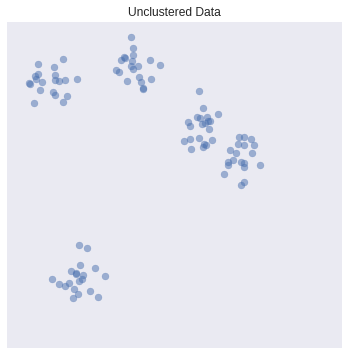

In epoch 0


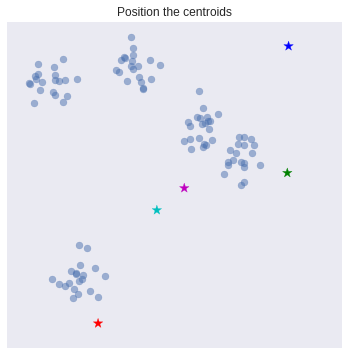

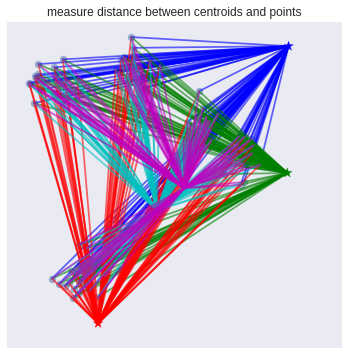

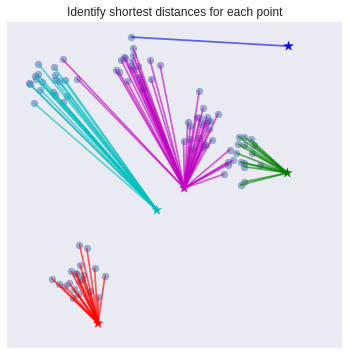

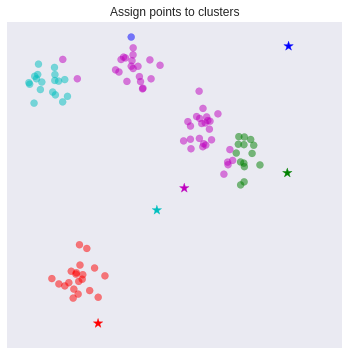

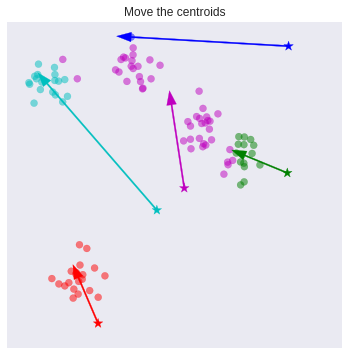

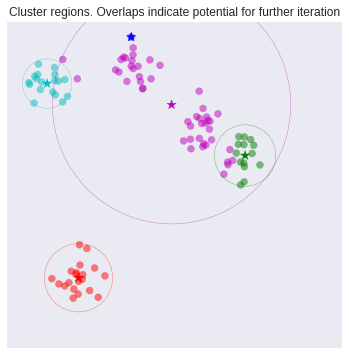

In epoch 1


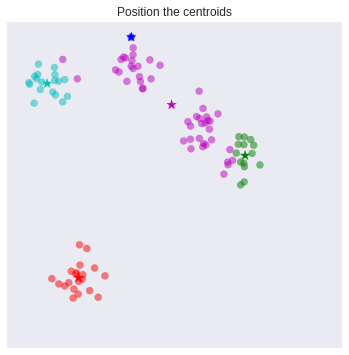

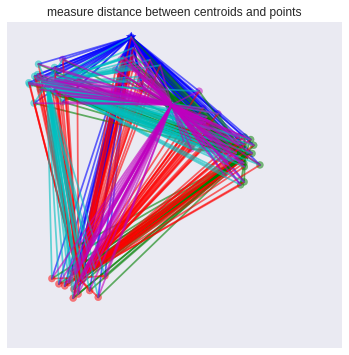

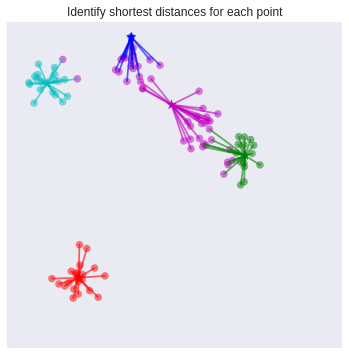

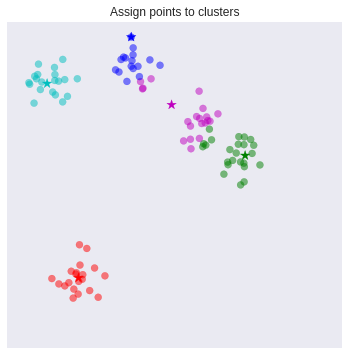

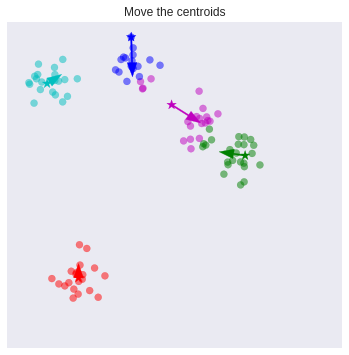

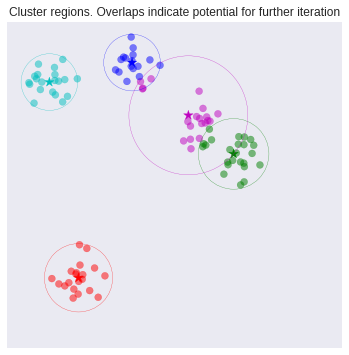

In epoch 2


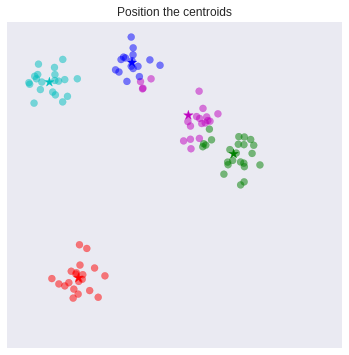

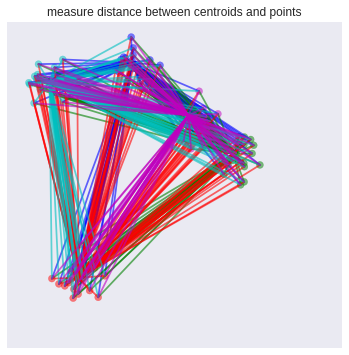

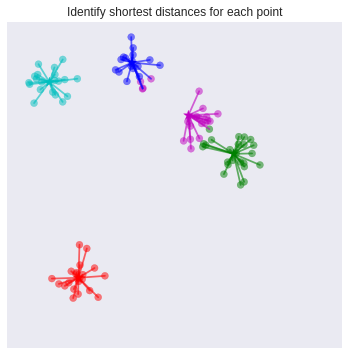

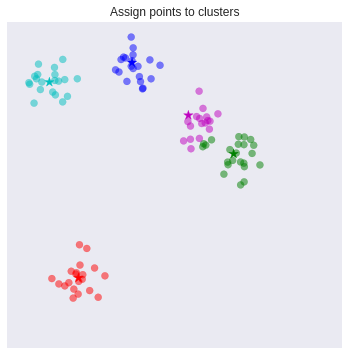

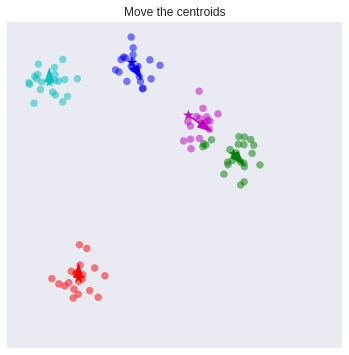

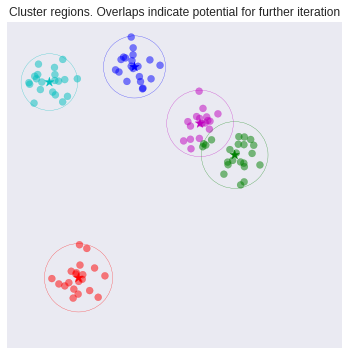

In epoch 3


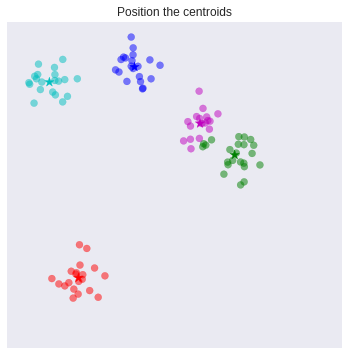

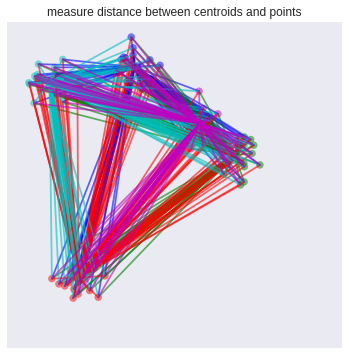

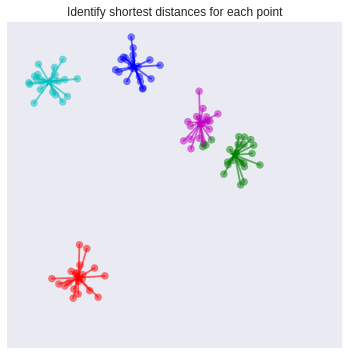

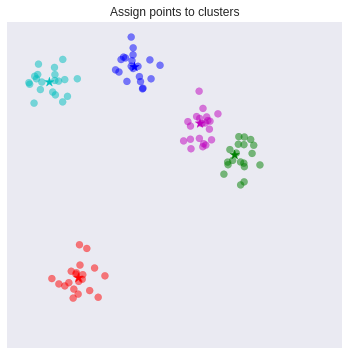

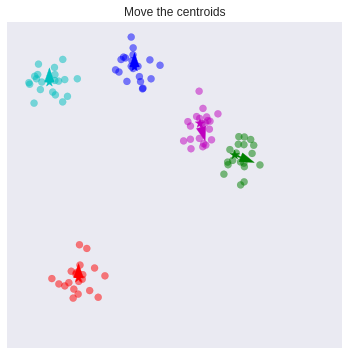

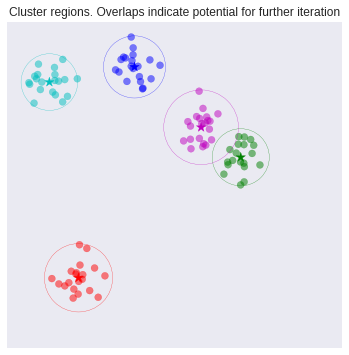

In epoch 4


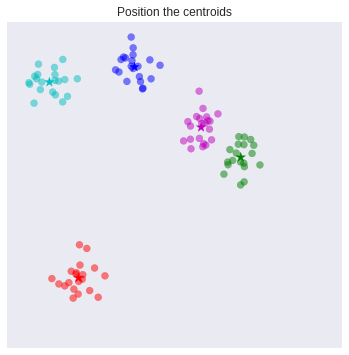

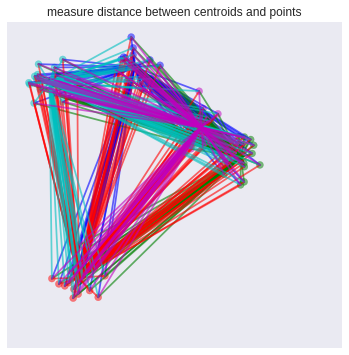

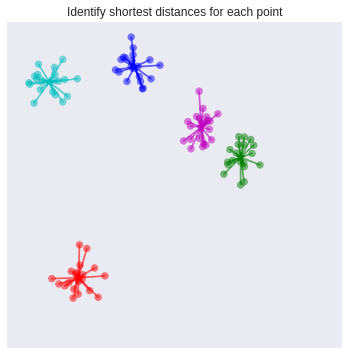

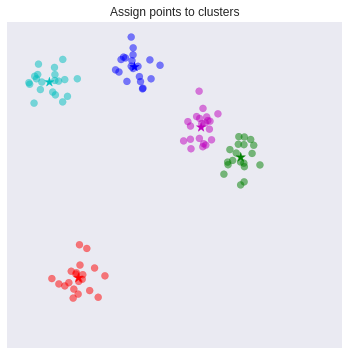

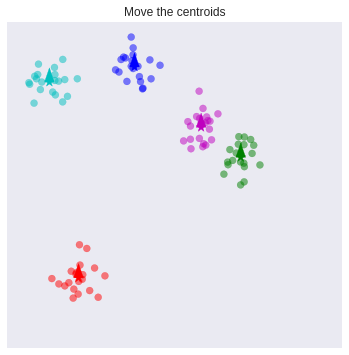

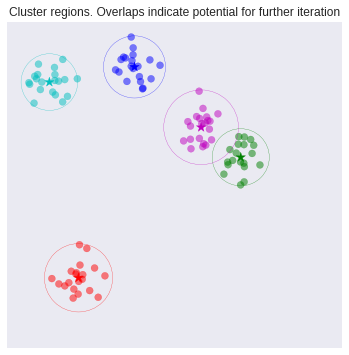

finished in epoch 4


In [158]:
# %%timeit
# np.random.seed(5) #works but with few iterations
np.random.seed(8)
kmeans.fit(X, plotting = True)

In [155]:
kmeans.clusters

array([2, 3, 4, 3, 4, 2, 0, 0, 0, 4, 4, 2, 3, 4, 0, 4, 3, 3, 2, 4, 4, 0, 4,
       2, 4, 4, 3, 3, 3, 0, 2, 4, 3, 3, 3, 4, 4, 4, 4, 0, 2, 0, 0, 0, 4, 4,
       4, 2, 4, 3, 3, 0, 0, 2, 0, 4, 3, 3, 4, 4, 0, 4, 4, 2, 4, 2, 3, 3, 2,
       3, 4, 2, 2, 2, 3, 4, 0, 4, 3, 2, 3, 2, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 0, 2, 4, 2, 4, 0, 0])

In [361]:
set(kmeans.clusters)

{0, 1, 2, 3, 4}

In [38]:
clustered_df = pd.DataFrame(X, columns=feature_names)
clustered_df['assigned_cluster'] = kmeans.clusters

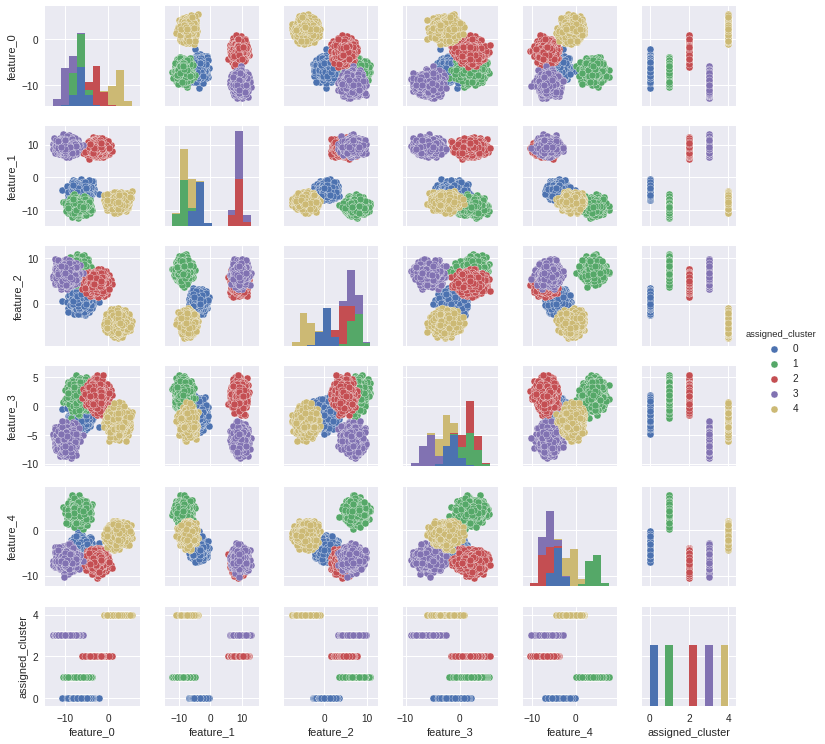

In [39]:
sns.pairplot(clustered_df, hue='assigned_cluster', size=1.75)

In [14]:
from sklearn.cluster import KMeans

In [15]:
sk_km = KMeans(n_clusters=5)

In [16]:
# %%timeit
sk_km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
sklearn_df = pd.DataFrame(X, columns=feature_names)
sklearn_df['assigned_cluster'] = sk_km.labels_

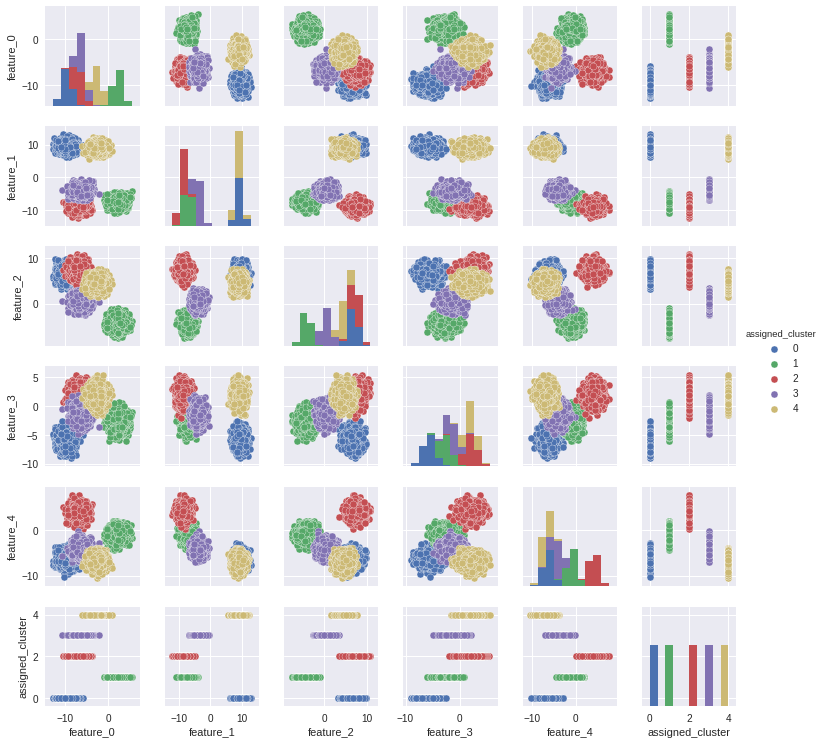

In [41]:
# fig, ax = plt.subplots(figsize=(6,6))
sns.pairplot(sklearn_df, hue='assigned_cluster', size=1.75)